<a href="https://colab.research.google.com/github/EllieMwangi/MTN_Upgrade_Strategy/blob/master/MTN_Upgrade_Strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Defining the Question

### 1. Specifying the data analysis question

Understand mobile usage in select cities in the Ivory Coast to inform strategy to be used by MTN Cote d'Ivoire in upgrading its technology infastructure.

### 2. Defining Metric for Success

The objective will have been met we have identified the following:
- Which city has the highest user traffic based on provided data
- Which MTN product is the most frequently used per city and overall
- What are the busiest times of the day in terms of user traffic [This should be key in identifying the most suitable times for upgrades]

### 3. Understanding the context

MTN Cote d'Ivoire, a leading telecom company is looking to upgrade its technology infastructure for its mobile users in Ivory Coast. As a data scientist, I am tasked with helping MTN implement a suitable upgrading strategy within given cities by understanding mobile usage in them.

### 4. Recording the experimental design

1. Load datasets
2. Check for missing data
3. Check for duplicates 
4. Drop duplicates if present
5. Combine telcom datasets
6. Merge telcom dataset with geo data on site code attribute
7. Explore cities with highest traffic per region and per zone
8. Upon identifying high traffic cities, explore which product usage per city
9. Explore peak hours per day in high traffic cities


## Data Analysis

In [85]:
# Import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
%matplotlib inline

In [2]:
#Load datasets
geo_df = pd.read_csv('cells_geo.csv', sep=";", encoding='utf-8')

column_names = ['product', 'bill',	'datetime','cell_on_site','caller_anonymized', 'recipient_anonymized', 'country_a','country_b','cell_id', 'site_id']

cdr_07 = pd.read_csv('Telcom_dataset.csv', encoding='utf-8', names=column_names, header=0)
cdr_08 = pd.read_csv('Telcom_dataset2.csv', encoding='utf-8',names = column_names, header=0)
cdr_09 = pd.read_csv('Telcom_dataset3.csv', encoding='utf-8', names = column_names, header=0)

In [3]:
#Preview datasets
geo_df.head()

,Unnamed: 0,VILLES,STATUS,LOCALISATION,DECOUPZONE,ZONENAME,LONGITUDE,LATITUDE,REGION,AREA,CELL_ID,SITE_CODE
0,0,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,fbb2e75af3,0bb492ef17
1,1,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,1502501d78,0bb492ef17
2,2,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,0c2e182a0c,0bb492ef17
3,3,ASSINIE,In Service,INTERIEUR,Grand-EST,"ASSINIE""",-3.488467,5.158761,SUD COMOE,NaN,69bdfc69fd,8a1e6ce31f
4,4,ASSINIE,In Service,INTERIEUR,Grand-EST,"ASSINIE""",-3.488467,5.158761,SUD COMOE,NaN,7a1029d2ab,8a1e6ce31f


In [4]:
geo_df.tail()

,Unnamed: 0,VILLES,STATUS,LOCALISATION,DECOUPZONE,ZONENAME,LONGITUDE,LATITUDE,REGION,AREA,CELL_ID,SITE_CODE
3969,3969,ZUENOULA,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,-6.039694,7.428611,MARAHOUE,CENTRE NORTH,1cfc2d7ab1,f91ed8d2e9
3970,3970,ZUENOULA,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,-6.039694,7.428611,MARAHOUE,CENTRE NORTH,3ae1708153,f91ed8d2e9
3971,3971,ZUENOULA,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,-6.065450,7.444592,MARAHOUE,CENTRE NORTH,cb71f8a29c,61bee9c70c
3972,3972,ZUENOULA,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,-6.065450,7.444592,MARAHOUE,CENTRE NORTH,d4a6a0b645,61bee9c70c
3973,3973,ZUENOULA,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,-6.065450,7.444592,MARAHOUE,CENTRE NORTH,f9f3e42589,61bee9c70c


In [5]:
geo_df.sample(5)

,Unnamed: 0,VILLES,STATUS,LOCALISATION,DECOUPZONE,ZONENAME,LONGITUDE,LATITUDE,REGION,AREA,CELL_ID,SITE_CODE
934,934,COCODY,In Service,ABIDJAN,Abidjan_EST,ZONE B - Abidjan_EST,-3.981028,5.356778,LAGUNE,ABIDJAN NORTH,21de9f8833,a64fc672f1
2605,2605,NIAMANA,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,-7.887611,9.584861,DENGUELE,NORTH WEST,d0692f1086,7d41b1e068
1829,1829,HERMANKONONO/DIES,In Service,INTERIEUR,Grand-SUD,ZONE B - Grand-SUD,-5.363306,5.580444,SUD BANDAMA,SOUTH WEST,946fd5faac,cef3f76edc
1283,1283,DAOUKRO,In Service,INTERIEUR,Grand-EST,ZONE C - Grand-EST,-3.973611,7.068056,NZI COMOE,EAST,65af36164a,02f6336d54
3759,3759,YAOKRO,In Service,INTERIEUR,Grand-SUD,ZONE B - Grand-SUD,-5.846139,6.727306,MARAHOUE,SOUTH WEST,a1b41e7b3c,a5c72e2787


In [6]:
# Drop unnamed column
geo_df.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
#Preview cdr datasets
cdr_07.head(10)

,product,bill,datetime,cell_on_site,caller_anonymized,recipient_anonymized,country_a,country_b,cell_id,site_id
0,Voice,0,2012-05-06 23:04:37.0,1,49fae048b547780,1a49f8b0ded9de6,19e2e,19e2e,/TJNe+Mmtu,/TJNe+Mmtu
1,sms,0,2012-05-06 23:05:25.0,0,7a54a6eaee19e65,93343ba6e41af95,19e2e,19e2e,/+cKZKIp41,/+cKZKIp41
2,sms,25,2012-05-06 23:05:41.0,0,6008887b0207d82,7aacc9709ce0a20,19e2e,19e2e,/u0FSD+ahi,/u0FSD+ahi
3,Voice,56,2012-05-06 23:05:42.0,1,7370032e20f4e96,6af4a60e74c91d3,19e2e,19e2e,+cNeJzsTp3,+cNeJzsTp3
4,Voice,14,2012-05-06 23:06:29.0,1,966ba4656e38e62,02aa736ee555d5c,19e2e,19e2e,051KhYDCpv,051KhYDCpv
5,data,0,2012-05-06 23:07:26.0,_,f71825ca6e623f9,5a4dc9e82deb309,19e2e,OTHER,/lrUXVGVcN,/lrUXVGVcN
6,Voice,0,2012-05-06 23:08:02.0,1,4afd7d5af21b1ce,67bf1ac30e58e2f,19e2e,19e2e,+38u2u/rfx,+38u2u/rfx
7,Voice,0,2012-05-06 23:08:03.0,5,d717dee81c51389,adde5afd9a67b10,19e2e,19e2e,09UjmmY1Ds,09UjmmY1Ds
8,Voice,0,2012-05-06 23:08:05.0,1,44522aefdc918a6,19e68e80103885e,19e2e,19e2e,0DeimCpZOc,0DeimCpZOc
9,sms,0,2012-05-06 23:08:43.0,0,0763a571d24db64,f773694c00c74d2,19e2e,19e2e,01MDiY5F89,01MDiY5F89


In [8]:
cdr_07.sample(10)

,product,bill,datetime,cell_on_site,caller_anonymized,recipient_anonymized,country_a,country_b,cell_id,site_id
4220,sms,0,2012-05-07 00:01:33.0,0,b2935f10f8611d0,e09e736e46c5c3d,19e2e,19e2e,f3ef98c052,204d4d24d1
4277,Voice,0,2012-05-07 00:01:34.0,1,5b3731e2e20df7e,b884454f1464b7d,19e2e,19e2e,085e63acc5,487765ff90
1078,Voice,0,2012-05-07 00:00:09.0,0,d09ae90f4fb3a53,f3ed866243ef819,19e2e,19e2e,6d374a471c,95b4afcbc7
2789,data,0,2012-05-07 00:00:53.0,_,2774224e9d3b454,5a4dc9e82deb309,19e2e,OTHER,ffa6759bb2,NaN
4049,Voice,20,2012-05-07 00:01:28.0,2,16c3661176a2aa0,e8cf3deec1d01b5,19e2e,19e2e,6d81ab4bd7,bc6c0ddf34
3901,sms,0,2012-05-07 00:01:25.0,0,f54d3fd5108b8b3,aaaf0e4bdec7311,19e2e,19e2e,5c7e7e1b92,521d2ac7b9
4513,sms,0,2012-05-07 00:01:41.0,3,ac0b28d4cde611d,cb5bbf0f5e4c582,19e2e,19e2e,93d38fc386,3ae1708153
3384,Voice,17,2012-05-07 00:01:10.0,1,93663694bfbce26,c8ce3c71241f166,19e2e,19e2e,069b659109,7e46936864
1824,sms,25,2012-05-07 00:00:28.0,4,5175dcf8e9eac1b,31828c3d775394d,19e2e,19e2e,74ffac08d2,66e2080825
525,data,0,2012-05-06 23:52:24.0,_,2799385d9c620af,5a4dc9e82deb309,19e2e,OTHER,CUPfBzjJhL,CUPfBzjJhL


In [9]:
cdr_08.head(10)

,product,bill,datetime,cell_on_site,caller_anonymized,recipient_anonymized,country_a,country_b,cell_id,site_id
0,sms,0,2012-05-07 23:02:06.0,2,32255675c3b6fe3,1aa7ae01386e9fb,19e2e,19e2e,+854AcBQT2,+854AcBQT2
1,Voice,0,2012-05-07 23:03:44.0,1,ff16d6ac74c1c64,87d87309c15a8c9,19e2e,19e2e,+854AcBQT2,+854AcBQT2
2,sms,0,2012-05-07 23:04:06.0,0,98d9f2fb5ff624b,93343ba6e41af95,19e2e,19e2e,+laSrk7g6q,+laSrk7g6q
3,Voice,37,2012-05-07 23:04:48.0,1,3f9c8a33ec7be1f,7d05a38f89c49d8,19e2e,19e2e,/xvRrCVKoQ,/xvRrCVKoQ
4,sms,25,2012-05-07 23:04:58.0,1,7bcccc03adf3864,56a5d5430d2fa86,19e2e,19e2e,+bO+qkSonO,+bO+qkSonO
5,sms,0,2012-05-07 23:05:41.0,4,d73f11fdc9fcb30,ec90fdb12b50cbc,19e2e,19e2e,/MMplBlWjh,/MMplBlWjh
6,Voice,41,2012-05-07 23:06:14.0,1,eafaf521153b405,70a60b7bca83a58,19e2e,19e2e,+laSrk7g6q,+laSrk7g6q
7,Voice,11,2012-05-07 23:06:28.0,0,a1799cdc5108a90,efee282793c4e56,19e2e,19e2e,+gySf02tKW,+gySf02tKW
8,sms,0,2012-05-07 23:06:35.0,2,f81bb99db8c0373,7af76c2046e02f3,19e2e,OTHER,/0FxP3az1x,/0FxP3az1x
9,sms,0,2012-05-07 23:06:50.0,0,6a7d89469dc20e9,3690c6c0444c0c0,19e2e,19e2e,0ecjmwPX21,0ecjmwPX21


In [10]:
cdr_09.head(10)

,product,bill,datetime,cell_on_site,caller_anonymized,recipient_anonymized,country_a,country_b,cell_id,site_id
0,Voice,61,2012-05-08 23:01:28.0,2,966f68353622feb,ffd53a3bb2db6f1,19e2e,19e2e,+38u2u/rfx,+38u2u/rfx
1,sms,0,2012-05-08 23:01:31.0,1,a0a597384c612d7,cf3b218f1dde792,19e2e,19e2e,+Fs4mTvdKx,+Fs4mTvdKx
2,Voice,10,2012-05-08 23:02:59.0,1,5441a9a58c97132,52f8b299515b9b7,19e2e,19e2e,+ZaaZozy/+,+ZaaZozy/+
3,sms,0,2012-05-08 23:03:04.0,0,8ab8b9ed6989f61,e09e736e46c5c3d,19e2e,19e2e,+cNeJzsTp3,+cNeJzsTp3
4,Voice,22,2012-05-08 23:03:16.0,4,52662a62b199334,2186273faab4602,19e2e,19e2e,/eeMklgyJA,/eeMklgyJA
5,Voice,10,2012-05-08 23:03:59.0,0,c572f692ed9d25f,5e6221fa6b35f62,19e2e,19e2e,+e+xcimwre,+e+xcimwre
6,sms,0,2012-05-08 23:06:06.0,0,32cc9a0c68cc9ee,9eb1b241c685914,19e2e,19e2e,+R5ccmtyJf,+R5ccmtyJf
7,Voice,10,2012-05-08 23:06:55.0,1,38c234bf93b3aac,ae0bd079dc09dd5,19e2e,19e2e,+ZaaZozy/+,+ZaaZozy/+
8,sms,25,2012-05-08 23:07:09.0,1,6dd0d088cceca75,9bdc6a2acd8ee15,19e2e,19e2e,13O1+JEun3,13O1+JEun3
9,sms,0,2012-05-08 23:07:38.0,0,9572b11240ca426,64898ae3aa9cc93,19e2e,19e2e,/eeMklgyJA,/eeMklgyJA


In [11]:
# drop unneccesary columns
to_drop = ['cell_on_site','country_a','country_b']
cdr_07.drop(to_drop, axis=1,inplace=True)
cdr_08.drop(to_drop, axis=1,inplace=True)
cdr_09.drop(to_drop, axis=1,inplace=True)

In [12]:
# Check shape of datasets
geo_df.shape

(3974, 11)

In [13]:
geo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3974 entries, 0 to 3973
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   VILLES        3974 non-null   object 
 1   STATUS        3907 non-null   object 
 2   LOCALISATION  3974 non-null   object 
 3   DECOUPZONE    3974 non-null   object 
 4   ZONENAME      3968 non-null   object 
 5   LONGITUDE     3974 non-null   float64
 6   LATITUDE      3974 non-null   float64
 7   REGION        3974 non-null   object 
 8   AREA          3951 non-null   object 
 9   CELL_ID       3974 non-null   object 
 10  SITE_CODE     3974 non-null   object 
dtypes: float64(2), object(9)
memory usage: 341.6+ KB


In [14]:
cdr_07.shape

(5001, 7)

In [15]:
cdr_07.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   product               5001 non-null   object
 1   bill                  5001 non-null   int64 
 2   datetime              5001 non-null   object
 3   caller_anonymized     5001 non-null   object
 4   recipient_anonymized  5001 non-null   object
 5   cell_id               5001 non-null   object
 6   site_id               4285 non-null   object
dtypes: int64(1), object(6)
memory usage: 273.6+ KB


In [16]:
cdr_08.shape

(5001, 7)

In [17]:
cdr_08.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   product               5001 non-null   object
 1   bill                  5001 non-null   int64 
 2   datetime              5001 non-null   object
 3   caller_anonymized     5001 non-null   object
 4   recipient_anonymized  5001 non-null   object
 5   cell_id               5001 non-null   object
 6   site_id               4325 non-null   object
dtypes: int64(1), object(6)
memory usage: 273.6+ KB


In [18]:
cdr_09.shape

(5001, 7)

In [19]:
cdr_09.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   product               5001 non-null   object
 1   bill                  5001 non-null   int64 
 2   datetime              5001 non-null   object
 3   caller_anonymized     5001 non-null   object
 4   recipient_anonymized  5001 non-null   object
 5   cell_id               5001 non-null   object
 6   site_id               4396 non-null   object
dtypes: int64(1), object(6)
memory usage: 273.6+ KB


In [20]:
# Check for missing values
geo_df.isnull().sum().sort_values(ascending=False)

STATUS          67
AREA            23
ZONENAME         6
SITE_CODE        0
CELL_ID          0
REGION           0
LATITUDE         0
LONGITUDE        0
DECOUPZONE       0
LOCALISATION     0
VILLES           0
dtype: int64

In [21]:
#Check for duplicates
geo_df.duplicated().value_counts()

False    3931
True       43
dtype: int64

In [22]:
#Check for missing values
cdr_07.isnull().sum().sort_values(ascending=False)

site_id                 716
cell_id                   0
recipient_anonymized      0
caller_anonymized         0
datetime                  0
bill                      0
product                   0
dtype: int64

In [23]:
cdr_08.isnull().sum().sort_values(ascending=False)

site_id                 676
cell_id                   0
recipient_anonymized      0
caller_anonymized         0
datetime                  0
bill                      0
product                   0
dtype: int64

In [24]:
cdr_09.isnull().sum().sort_values(ascending=False)

site_id                 605
cell_id                   0
recipient_anonymized      0
caller_anonymized         0
datetime                  0
bill                      0
product                   0
dtype: int64

In [25]:
#Check for duplicates
cdr_07.duplicated().value_counts()

False    4919
True       82
dtype: int64

In [26]:
cdr_08.duplicated().value_counts()

False    4923
True       78
dtype: int64

In [27]:
cdr_09.duplicated().value_counts()

False    4908
True       93
dtype: int64

In [28]:
# Drop all duplicates
geo_df.drop_duplicates(inplace=True)
cdr_07.drop_duplicates(inplace=True)
cdr_08.drop_duplicates(inplace=True)
cdr_09.drop_duplicates(inplace=True)

In [29]:
# Join cdr_07, cdr_08, cdr_09 dataframes
cdr_all = pd.concat([cdr_07,cdr_08,cdr_09], axis=0, join='outer',ignore_index=True)

In [30]:
cdr_all.head()

,product,bill,datetime,caller_anonymized,recipient_anonymized,cell_id,site_id
0,Voice,0,2012-05-06 23:04:37.0,49fae048b547780,1a49f8b0ded9de6,/TJNe+Mmtu,/TJNe+Mmtu
1,sms,0,2012-05-06 23:05:25.0,7a54a6eaee19e65,93343ba6e41af95,/+cKZKIp41,/+cKZKIp41
2,sms,25,2012-05-06 23:05:41.0,6008887b0207d82,7aacc9709ce0a20,/u0FSD+ahi,/u0FSD+ahi
3,Voice,56,2012-05-06 23:05:42.0,7370032e20f4e96,6af4a60e74c91d3,+cNeJzsTp3,+cNeJzsTp3
4,Voice,14,2012-05-06 23:06:29.0,966ba4656e38e62,02aa736ee555d5c,051KhYDCpv,051KhYDCpv


In [31]:
cdr_all.tail()

,product,bill,datetime,caller_anonymized,recipient_anonymized,cell_id,site_id
14745,Voice,10,2012-05-09 00:01:43.0,2f834987f0c1825,accc8e5c1164343,6467daa1db,8a96bae9c1
14746,Voice,0,2012-05-09 00:01:43.0,467333ade2b4b9c,0ab2acd804d01fe,2aa04dcab7,f7d63a29e5
14747,Voice,62,2012-05-09 00:01:43.0,e077a6b74c5053c,4c8098eb6ea1a41,7f1f2f889f,b4ddb9e93c
14748,Voice,30,2012-05-09 00:01:43.0,672ce74c418aa7a,f9ff5af59cf0d68,98ed726da2,b4130b54ab
14749,Voice,60,2012-05-09 00:01:43.0,6edeb4c55714650,7e60838216482a7,1c11a2fcbb,6d70dae094


In [32]:
cdr_all.shape

(14750, 7)

### Merge DataFrames

In [33]:
merged_df = pd.merge(cdr_all, geo_df, how='inner', left_on=['site_id'], right_on=['SITE_CODE'])

In [34]:
merged_df.shape

(49702, 18)

In [35]:
merged_df.head()

,product,bill,datetime,caller_anonymized,recipient_anonymized,cell_id,site_id,VILLES,STATUS,LOCALISATION,DECOUPZONE,ZONENAME,LONGITUDE,LATITUDE,REGION,AREA,CELL_ID,SITE_CODE
0,sms,0,2012-05-07 00:00:00.0,8118c3aa53d6c7b,1d103ea638ad1f0,5d9dc897f7,1b5540c02d,BOUAKE,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,-5.027139,7.718417,VALLEE DU BANDAMA,CENTRE NORTH,24ccdda3d5,1b5540c02d
1,sms,0,2012-05-07 00:00:00.0,8118c3aa53d6c7b,1d103ea638ad1f0,5d9dc897f7,1b5540c02d,BOUAKE,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,-5.027139,7.718417,VALLEE DU BANDAMA,CENTRE NORTH,ebfc58af70,1b5540c02d
2,sms,0,2012-05-07 00:00:00.0,8118c3aa53d6c7b,1d103ea638ad1f0,5d9dc897f7,1b5540c02d,BOUAKE,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,-5.027139,7.718417,VALLEE DU BANDAMA,CENTRE NORTH,ba8ce6e4ef,1b5540c02d
3,sms,0,2012-05-07 00:00:00.0,8118c3aa53d6c7b,1d103ea638ad1f0,5d9dc897f7,1b5540c02d,BOUAKE,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,-5.027139,7.718417,VALLEE DU BANDAMA,CENTRE NORTH,c2545171dc,1b5540c02d
4,sms,0,2012-05-07 00:00:00.0,8118c3aa53d6c7b,1d103ea638ad1f0,5d9dc897f7,1b5540c02d,BOUAKE,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,-5.027139,7.718417,VALLEE DU BANDAMA,CENTRE NORTH,f15bd5483f,1b5540c02d


In [36]:
merged_df.sample(10)

,product,bill,datetime,caller_anonymized,recipient_anonymized,cell_id,site_id,VILLES,STATUS,LOCALISATION,DECOUPZONE,ZONENAME,LONGITUDE,LATITUDE,REGION,AREA,CELL_ID,SITE_CODE
589,Voice,7,2012-05-08 00:01:51.0,57d19f92951d1bf,995cfb0ca3176c0,278f971e13,2443d87035,KORHOGO,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,-5.617333,9.443611,SAVANE,CENTRE NORTH,fb63d19299,2443d87035
33697,sms,0,2012-05-08 00:01:42.0,895b66cf8427b36,00b4cd1398c9cb6,10ae6c0752,0f34c36ac5,ABOBO,In Service,ABIDJAN,Abidjan_NORD,ZONE E - Abidjan_NORD,-4.014139,5.433500,LAGUNE,ABIDJAN NORTH,e460975c9f,0f34c36ac5
45702,sms,0,2012-05-07 00:01:22.0,8add540569bdb41,e09e736e46c5c3d,01675c15d3,0fd78ac3d4,RAPIDES GRAH,In Service,INTERIEUR,SUD-OUEST,ZONE E - SUD-OUEST,-6.644050,5.106522,BAS SASSANDRA,SOUTH WEST,6ac0e2d021,0fd78ac3d4
23237,sms,0,2012-05-07 00:00:14.0,cc5f6054c6f0a59,8f693b1d48ffd38,42f7c74041,1ed7b897b7,YOPOUGON,In Service,ABIDJAN,Abidjan_OUEST,ZONE C - Abidjan_OUEST,-4.110833,5.317583,LAGUNE,ABIDJAN NORTH,6ff88de39d,1ed7b897b7
4925,sms,0,2012-05-07 00:00:20.0,8bab6662bdc4230,f2694312e77de8a,88425d57f4,ebfc58af70,YOPOUGON,In Service,ABIDJAN,Abidjan_OUEST,ZONE C - Abidjan_OUEST,-4.070389,5.367944,LAGUNE,ABIDJAN NORTH,5bd9874193,ebfc58af70
970,sms,25,2012-05-08 00:00:03.0,81c2631eafbdd19,9952eb3909e21cc,8ffe9d4359,56c70baa97,ISSIA,In Service,INTERIEUR,Grand-OUEST,ZONE D - Grand-OUEST,-6.579083,6.495472,HAUT SASSANDRA,NORTH WEST,485a0f8832,56c70baa97
683,sms,25,2012-05-09 00:00:09.0,79b8bda047e28c4,0edcfe28c6eea04,116bf9b603,65a987fa51,ABOBO,In Service,ABIDJAN,Abidjan_NORD,ZONE E - Abidjan_NORD,-4.029639,5.440472,LAGUNE,ABIDJAN NORTH,33420c4250,65a987fa51
2108,sms,0,2012-05-08 00:01:06.0,79dc6b20df03bd2,7eab5416443edd9,0a5355b362,700e13a5cf,ABOBO,In Service,ABIDJAN,Abidjan_NORD,ZONE E - Abidjan_NORD,-4.002250,5.420472,LAGUNE,ABIDJAN NORTH,eecb977fb3,700e13a5cf
5228,Voice,272,2012-05-09 00:01:40.0,2e707e8e21213b7,5bbb20f1afd1875,6f4d9b77a5,ebfc58af70,YOPOUGON,In Service,ABIDJAN,Abidjan_OUEST,ZONE C - Abidjan_OUEST,-4.070389,5.367944,LAGUNE,ABIDJAN NORTH,a29966872f,ebfc58af70
39082,Voice,12,2012-05-09 00:01:17.0,0356e304349df43,6955f096986c483,f1b81b6f44,5255819549,LAKOTA,In Service,INTERIEUR,Grand-SUD,ZONE B - Grand-SUD,-5.682861,5.845000,SUD BANDAMA,SOUTH WEST,5d5af84d7e,5255819549


In [37]:
#drop columns 
to_drop = ['recipient_anonymized','cell_id','CELL_ID','SITE_CODE']
merged_df.drop(to_drop, axis=1, inplace=True)

In [38]:
merged_df.shape

(49702, 14)

In [39]:
# Check for null values if merged dataframe
merged_df.isnull().sum()

product                0
bill                   0
datetime               0
caller_anonymized      0
site_id                0
VILLES                 0
STATUS               677
LOCALISATION           0
DECOUPZONE             0
ZONENAME              18
LONGITUDE              0
LATITUDE               0
REGION                 0
AREA                 256
dtype: int64

#### Data Exploration

In [40]:
# Which regions have the highest frequency of calls?
merged_df['REGION'].value_counts()

LAGUNE               32547
LACS                  2408
BAS SASSANDRA         2327
HAUT SASSANDRA        2277
VALLEE DU BANDAMA     1551
SUD BANDAMA           1518
SAVANE                 980
FROMAGER               904
WORODOUGOU             792
18 MONTAGNES           765
MARAHOUE               618
AGNEBY                 581
NZI COMOE              564
MOYEN CAVALLY          528
DENGUELE               395
ZANZAN                 330
MOYEN COMOE            315
SUD COMOE              203
BAFING                  99
Name: REGION, dtype: int64

The following regions have the highest traffic:
- LAGUNE :              32547
- LACS    :              2408
- BAS SASSANDRA :         2327
- HAUT SASSANDRA  :      2277
- VALLEE DU BANDAMA  :   1551
- SUD BANDAMA :           1518

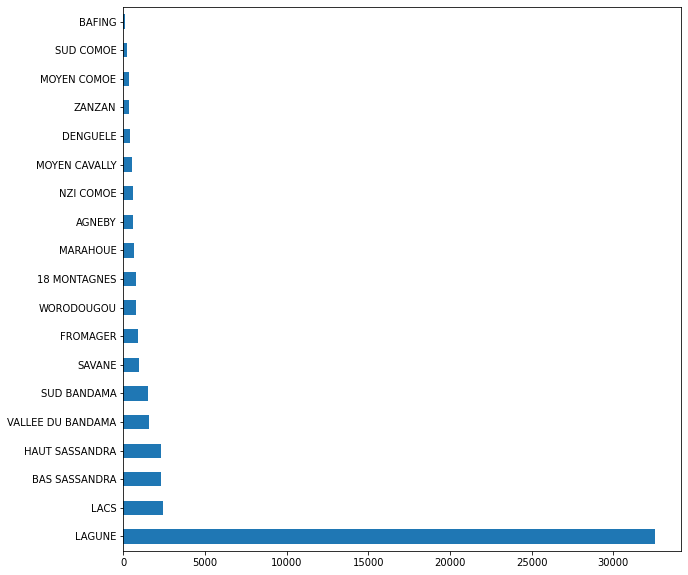

In [41]:
merged_df['REGION'].value_counts().plot(kind='barh', figsize=(10,10))

Lagune region has the largest percentage in frequency of usage of MTN network

In [42]:
merged_df['ZONENAME'].value_counts()

ZONE C - Abidjan_OUEST     10296
ZONE E - Abidjan_NORD       6660
ZONE B - Grand-SUD          5545
ZONE B - Abidjan_EST        4838
ZONE D - Abidjan_SUD        4642
ZONE D - Grand-OUEST        4314
ZONE A - Abidjan_CENTRE     4132
ZONE A - Grand-NORD         3928
ZONE E - SUD-OUEST          2993
ZONE C - Grand-EST          1748
ZONE D - Abidjan_EST         186
OKAHOTEL                     120
NPONON                        72
WILLIAMSVILLE2                40
ZONE C - Abidjan_EST          27
ZONE A - Abidjan_OUEST        21
PALMABINGERVILLE              21
ZONE A - Grand-SUD            18
ZONE B - Grand-EST            18
ZONE B - Abidjan_OUEST        18
ZONE C - Abidjan_SUD          15
ZONE D - Grand-SUD             6
ZONE B - Abidjan_SUD           6
ZONE A - Grand-EST             6
ZONE B - Grand-NORD            3
ZONE B - Abidjan_Nord          3
AGBANNEW                       3
ZONE B - Abidjan-EST           3
ZONE B - Abidjan_CENTRE        2
Name: ZONENAME, dtype: int64

The following zones have the highest traffic:
- ZONE C - Abidjan_OUEST :    10296
- ZONE E - Abidjan_NORD   :    6660
- ZONE B - Grand-SUD       :   5545
- ZONE B - Abidjan_EST      :  4838
- ZONE D - Abidjan_SUD       : 4642
- ZONE D - Grand-OUEST   :     4314
- ZONE A - Abidjan_CENTRE :    4132
- ZONE A - Grand-NORD      :   3928
- ZONE E - SUD-OUEST        :  2993
- ZONE C - Grand-EST         : 1748



#### Explore cities per region and per zone

In [43]:
high_traffic_zones = ['ZONE C - Abidjan_OUEST','ZONE E - Abidjan_NORD','ZONE B - Grand-SUD','ZONE B - Abidjan_EST',
                      'ZONE D - Abidjan_SUD','ZONE D - Grand-OUEST','ZONE A - Abidjan_CENTRE','ZONE A - Grand-NORD',
                      'ZONE E - SUD-OUEST','ZONE C - Grand-EST']

In [44]:
zones_df = merged_df[merged_df['ZONENAME'].isin(high_traffic_zones)]

In [45]:
zones_df.shape

(49096, 14)

In [46]:
# Determine cities in high traffic zones with traffic greater than 500
cities = zones_df['VILLES'].value_counts()
high_traffic_cities = cities[cities > 500]
high_traffic_cities

YOPOUGON        8432
ABOBO           5967
COCODY          3698
ADJAME          2442
KOUMASSI        2275
YAMOUSSOUKRO    2076
TREICHVILLE     2026
MARCORY         1901
DALOA           1747
ATTECOUBE       1607
PORT-BOUET      1423
SAN-PEDRO       1291
BOUAKE          1242
DIVO             969
GAGNOA           648
MAN              567
SOUBRE           537
Name: VILLES, dtype: int64

In [47]:
high_traffic_regions = ['LAGUNE','LACS','BAS SASSANDRA','HAUT SASSANDRA','VALLEE DU BANDAMA','SUD BANDAMA']

In [48]:
region_df = merged_df[merged_df['REGION'].isin(high_traffic_regions)]

In [49]:
region_df.shape

(42628, 14)

In [50]:
cities_regions = region_df['VILLES'].value_counts()

In [51]:
#Determine cities with traffic greater than 500 based on region grouping
high_cities_regions = cities_regions[cities_regions > 500]

In [52]:
# Extract cities that occur in both series
high_impact_cities = high_cities_regions | high_cities_regions

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

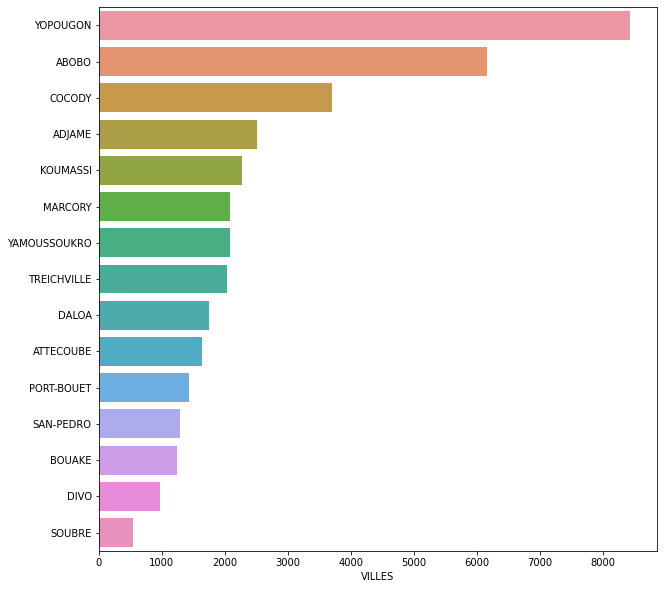

In [86]:

cities = plt.figure(figsize=(10,10))
sns.barplot(x = high_impact_cities, y = high_impact_cities.index)
plt.savefig('cities.png')
files.download('cities.png')

After identifying cities with the highest traffic, identify which product is the most frequently used in these cities

In [54]:
cities_df = merged_df[merged_df['VILLES'].isin(high_impact_cities.index)]

In [55]:
cities_df.shape

(38107, 14)

#### Explore product usage in high traffic cities

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

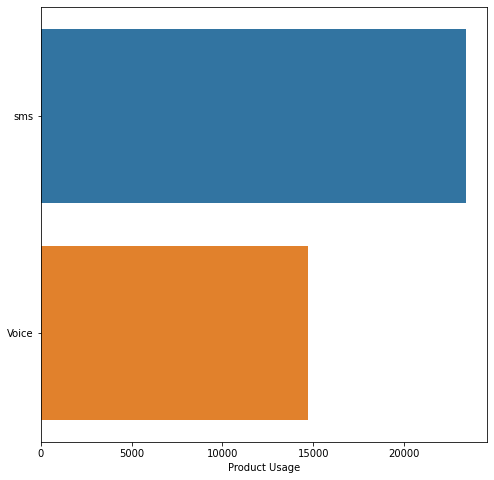

In [91]:
product_usage = plt.figure(figsize=(8,8))
usage = cities_df['product'].value_counts()
sns.barplot(x= usage, y=usage.index)
plt.xlabel('Product Usage')
plt.savefig('usage.png')
files.download('usage.png')

SMS services are more frequently used

In [77]:
services = cities_df['product'].value_counts(normalize=True)
services

sms      0.61448
Voice    0.38552
Name: product, dtype: float64

In [75]:
#Which product brings in more money?
profits = cities_df.groupby(['product'])['bill'].sum()
(profits / profits.sum())*100

product
Voice    81.231998
sms      18.768002
Name: bill, dtype: float64

In [79]:
cities_df.groupby(['VILLES'])['bill'].sum().sort_values(ascending=False)

VILLES
YOPOUGON        202167
COCODY          177745
ABOBO           124210
KOUMASSI         71356
TREICHVILLE      65557
MARCORY          59913
ADJAME           59455
YAMOUSSOUKRO     45090
SAN-PEDRO        44137
PORT-BOUET       35786
DALOA            34704
BOUAKE           33039
DIVO             23676
ATTECOUBE        19116
SOUBRE            7736
Name: bill, dtype: int64

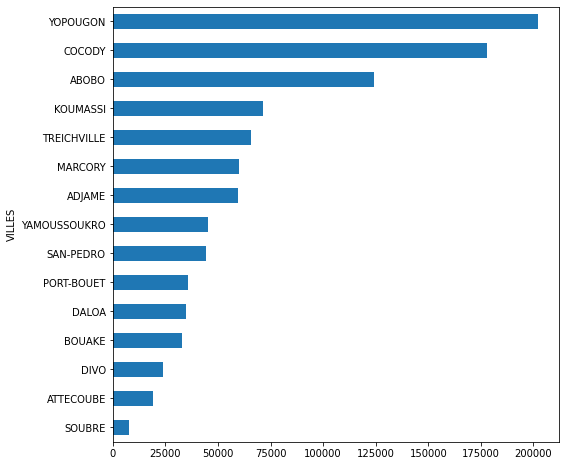

In [57]:
# Which city brings in more money?
cities_df.groupby(['VILLES'])['bill'].sum().sort_values(ascending=True).plot(kind='barh', figsize=(8,8))

In [58]:
# Which city brings in more money per product?
product_bills = cities_df.groupby(['VILLES','product'])['bill'].sum().reset_index()

In [59]:
product_bills

,VILLES,product,bill
0,ABOBO,Voice,95781
1,ABOBO,sms,28429
2,ADJAME,Voice,45925
3,ADJAME,sms,13530
4,ATTECOUBE,Voice,14266
5,ATTECOUBE,sms,4850
6,BOUAKE,Voice,28302
7,BOUAKE,sms,4737
8,COCODY,Voice,157920
9,COCODY,sms,19825


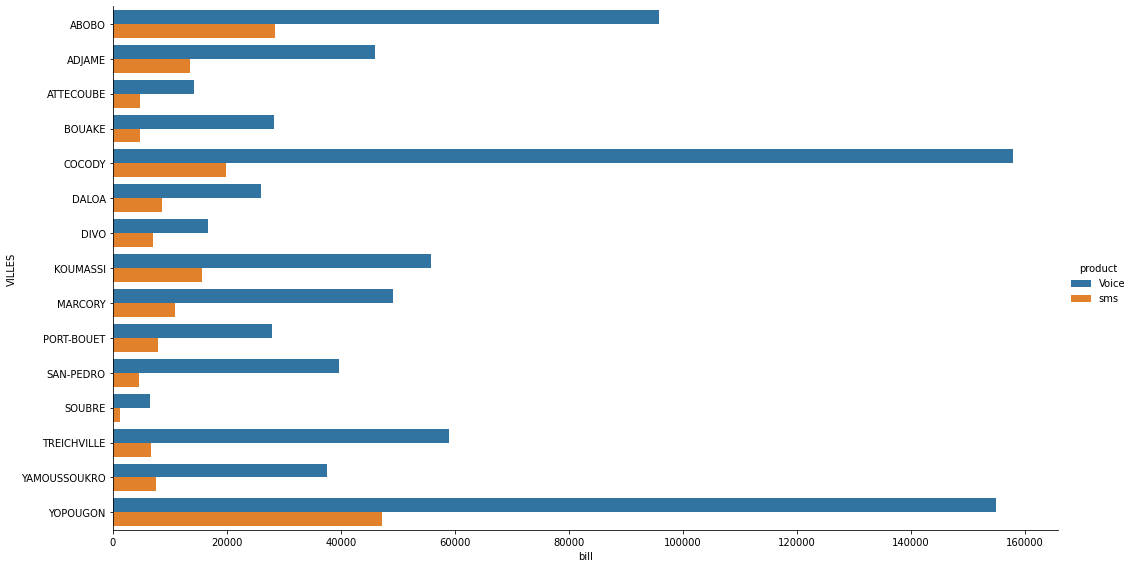

In [60]:
sns.catplot(x='bill', y='VILLES', hue='product', data=product_bills, kind='bar', height=8, aspect=15/8)

In [61]:
# Order cities by highest return in voice and sms products
table = pd.pivot_table(cities_df, values='bill', index=['product','VILLES'],aggfunc=np.sum)

In [62]:
table.groupby(
    level='product', group_keys=False
).apply(pd.DataFrame.sort_values, by='bill', ascending=False)

bill
product VILLES              
Voice   COCODY        157920
        YOPOUGON      154914
        ABOBO          95781
        TREICHVILLE    58932
        KOUMASSI       55781
        MARCORY        49085
        ADJAME         45925
        SAN-PEDRO      39606
        YAMOUSSOUKRO   37590
        BOUAKE         28302
        PORT-BOUET     27907
        DALOA          26044
        DIVO           16701
        ATTECOUBE      14266
        SOUBRE          6561
sms     YOPOUGON       47253
        ABOBO          28429
        COCODY         19825
        KOUMASSI       15575
        ADJAME         13530
        MARCORY        10828
        DALOA           8660
        PORT-BOUET      7879
        YAMOUSSOUKRO    7500
        DIVO            6975
        TREICHVILLE     6625
        ATTECOUBE       4850
        BOUAKE          4737
        SAN-PEDRO       4531
        SOUBRE          1175

#### Investigate periods of the day when users are most active

In [156]:
# Import datetime 
import datetime as dt

In [69]:
cdr_all.datetime.astype('datetime64[ns]').dt.hour.value_counts()

0     12731
23     2019
Name: datetime, dtype: int64

Interestingly, all call data seems to have been collected between 11 pm and 1:00 am. Is this a flaw in the data?

### Recommendations

After analysis, the following cities were identified to have the highest traffic based on available data and should therefore be the first cities to be considered in carrying out the upgrade plan:
- YOPOUGON        
- ABOBO           
- COCODY          
- ADJAME          
- KOUMASSI        
- MARCORY         
- YAMOUSSOUKRO    
- TREICHVILLE     
- DALOA           
- ATTECOUBE       
- PORT-BOUET      
- SAN-PEDRO       
- BOUAKE          
- DIVO            
- SOUBRE          

After comparison, the sms product was found to have a higher frequency of usage than the voice product. SMS occupying 61.4% while Voice occupies 38.5% of the total traffic. However, it is important to note that voice brings in 81.2% of the total profits while sms only brings in 18.7%.

Among the high traffic cities, the following 8 cities bring in the highest profits, from both products:
- YOPOUGON  
- COCODY 
- ABOBO 
- KOUMASSI 
- TREICHVILLE
- MARCORY 
- ADJAME 
- YAMOUSSOUKRO 

Upon categorizing profits per product, these are the top four cities in each category:

For the voice product:
1. COCODY	
2. YOPOUGON	
3. ABOBO
4. TREICHVILLE

For the sms product:
1. YOPOUGON	
2. ABOBO	
3. COCODY	
4. KOUMASSI